# A Project On Loan Application Status Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
loan = pd.read_csv("Loan_Status.csv")

In [4]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Stastics Summary

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [10]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
loan.shape

(614, 13)

In [12]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
loan.drop(['Loan_ID'], axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Extraploatry Data Analysis

The percentage of Y class : 0.69
The percentage of N class : 0.31


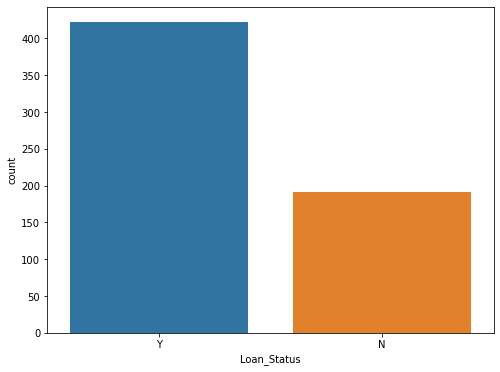

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(loan['Loan_Status']);

print('The percentage of Y class : %.2f' % (loan['Loan_Status'].value_counts()[0] / len(loan)))
print('The percentage of N class : %.2f' % (loan['Loan_Status'].value_counts()[1] / len(loan)))

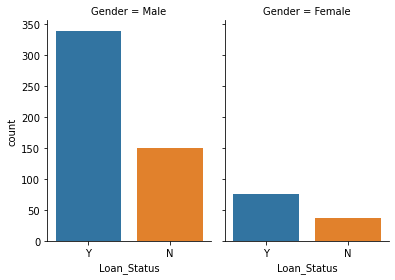

In [16]:
h = sns.catplot(x="Loan_Status", col="Gender",
                data=loan, kind="count",
                height=4, aspect=.7);

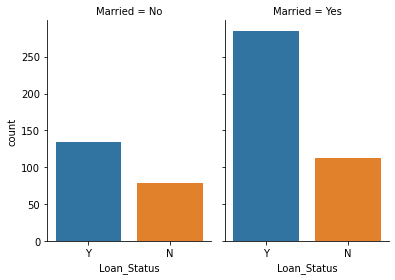

In [17]:
h = sns.catplot(x="Loan_Status", col='Married',
                data=loan, kind="count",
                height=4, aspect=.7);

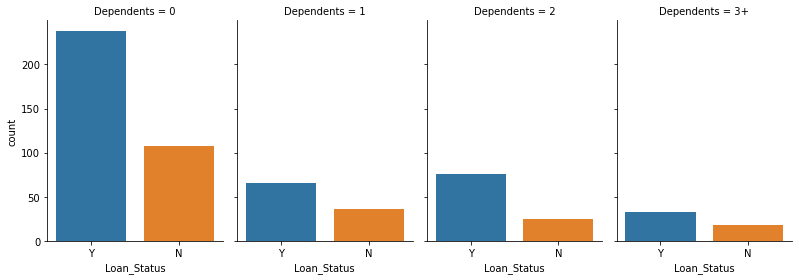

In [18]:
h = sns.catplot(x="Loan_Status", col='Dependents',
                data=loan, kind="count",
                height=4, aspect=.7);

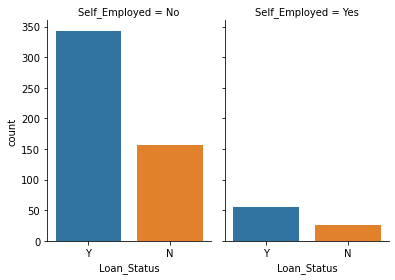

In [19]:
h = sns.catplot(x="Loan_Status", col=    'Self_Employed', 
                data=loan, kind="count",
                height=4, aspect=.7);

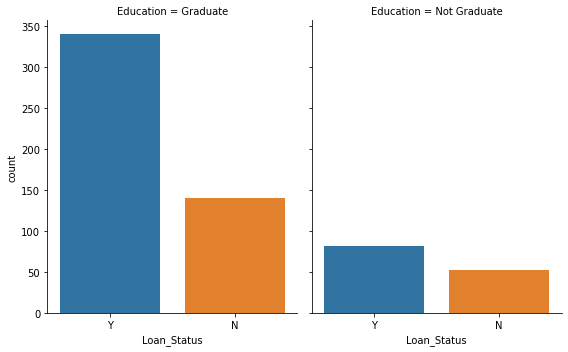

In [20]:
h = sns.catplot(x="Loan_Status", col= 'Education',
                data=loan, kind="count",
                height=5, aspect=.8);

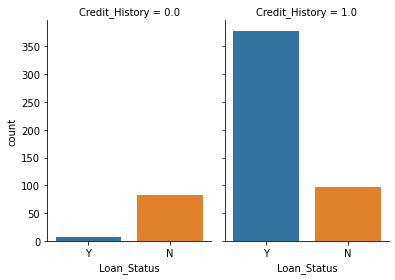

In [21]:
h = sns.catplot(x="Loan_Status", col = 'Credit_History',
                data=loan, kind="count",
                height=4, aspect=.7);

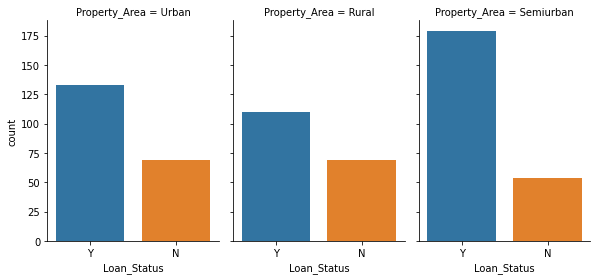

In [22]:
h = sns.catplot(x="Loan_Status", col= 'Property_Area',
                data=loan, kind="count",
                height=4, aspect=.7);

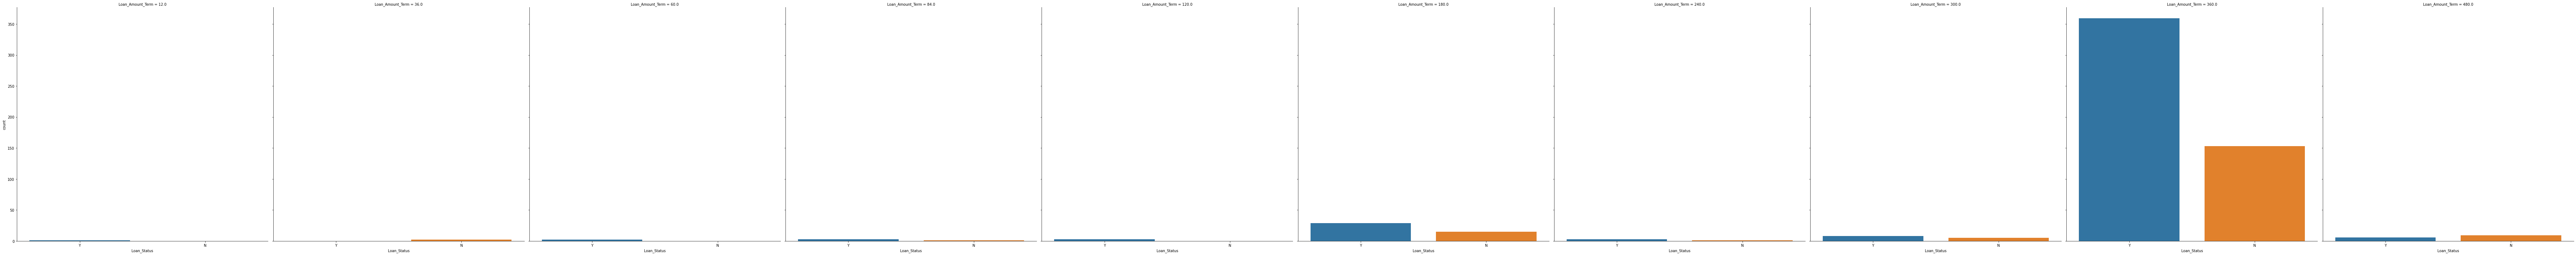

In [23]:
h = sns.catplot(x="Loan_Status", col= 'Loan_Amount_Term',
                data=loan, kind="count",
                height=10, aspect=1);

In [24]:
# Get the unique values and their frequency of variable Property_Area

loan['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

<AxesSubplot:>

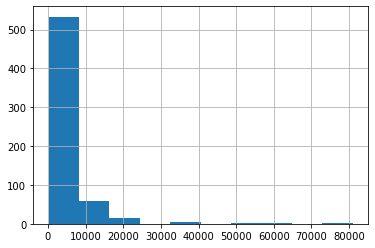

In [25]:
# Histogram of variable ApplicantIncome

loan['ApplicantIncome'].hist()

<AxesSubplot:>

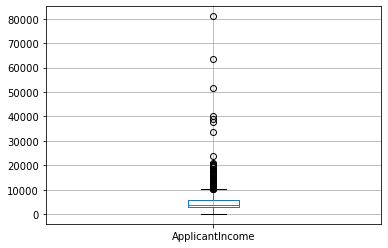

In [26]:
# Box Plot for variable ApplicantIncome of loan data set

loan.boxplot(column='ApplicantIncome')

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

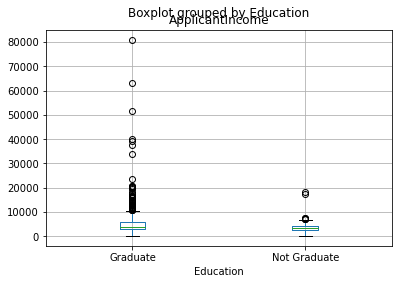

In [27]:
# Box Plot for variable ApplicantIncome by variable Education of loan data set

loan.boxplot(column='ApplicantIncome', by = 'Education')

<AxesSubplot:>

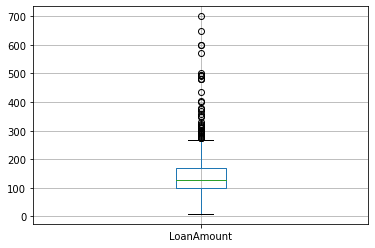

In [28]:
# Box Plot for variable LoanAmount of loan data set

loan.boxplot(column='LoanAmount')

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Gender'>

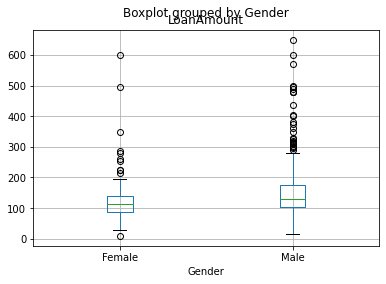

In [29]:
# Box Plot for variable LoanAmount by variable Gender of loan data set

loan.boxplot(column='LoanAmount', by = 'Gender')

# Distribution of Categorical Variables

In [30]:
# Loan approval rates in absolute numbers
loan_approval = loan['Loan_Status'].value_counts()['Y']
print(loan_approval)

422


In [31]:
# Credit History and Loan Status
pd.crosstab(loan ['Credit_History'], loan ['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [32]:
#Function to output percentage row wise in a cross table
def percentageConvert(ser):
    return ser/float(ser[-1])

# # Loan approval rate for customers having Credit_History (1)
#loan['Y'] = pd.crosstab(loan ["Credit_History"], loan ["Loan_Status"], margins=True).apply(percentageConvert, axis=1)
#loan_approval_with_Credit_1 = loan['Y'][1]
#print(loan_approval_with_Credit_1*100)

In [33]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [34]:
# Replace missing value of Self_Employed with more frequent category
loan['Self_Employed'].fillna('No',inplace=True)

# Outliers Of LoanAmount and Applicant Income

<AxesSubplot:>

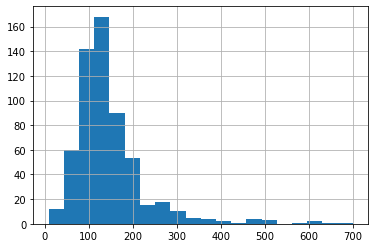

In [35]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
loan['TotalIncome'] = loan['ApplicantIncome'] + loan['CoapplicantIncome']

# Looking at the distribtion of TotalIncome
loan['LoanAmount'].hist(bins=20)

The extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect:

<AxesSubplot:>

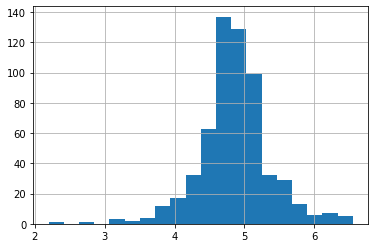

In [36]:
# Perform log transformation of TotalIncome to make it closer to normal
loan['LoanAmount_log'] = np.log(loan['LoanAmount'])

# Looking at the distribtion of TotalIncome_log
loan['LoanAmount_log'].hist(bins=20)

In [37]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
TotalIncome           0
LoanAmount_log       22
dtype: int64

In [38]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
TotalIncome           0
LoanAmount_log       22
dtype: int64

In [40]:
cat_data = []
num_data = []

for i,c in enumerate(loan.dtypes):
    if c == object:
        cat_data.append(loan.iloc[:, i])
    else :
        num_data.append(loan.iloc[:, i])

In [41]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [42]:
cat_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [43]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,LoanAmount_log
0,5849.0,0.0,NaN,360.0,1.0,5849.0,NaN
1,4583.0,1508.0,128.0,360.0,1.0,6091.0,4.852030
2,3000.0,0.0,66.0,360.0,1.0,3000.0,4.189655
3,2583.0,2358.0,120.0,360.0,1.0,4941.0,4.787492
4,6000.0,0.0,141.0,360.0,1.0,6000.0,4.948760


In [44]:
#propagate non-null values forward or backward.
num_data.fillna(method = 'bfill',inplace = True)

In [45]:
num_data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
TotalIncome          0
LoanAmount_log       0
dtype: int64

In [46]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,LoanAmount_log
0,5849.0,0.0,128.0,360.0,1.0,5849.0,4.852030
1,4583.0,1508.0,128.0,360.0,1.0,6091.0,4.852030
2,3000.0,0.0,66.0,360.0,1.0,3000.0,4.189655
3,2583.0,2358.0,120.0,360.0,1.0,4941.0,4.787492
4,6000.0,0.0,141.0,360.0,1.0,6000.0,4.948760


In [47]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
le = preprocessing.LabelEncoder() 
  

In [48]:
cat_data = cat_data.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [49]:
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [50]:
cat_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0,1,0,0,0,0,2,1
1,1,1,1,1,0,0,0,0
2,2,1,1,0,0,1,2,1
3,3,1,1,0,1,0,2,1
4,4,1,0,0,0,0,2,1


In [51]:
#target_values = {'Y': 0 , 'N' : 1}

target = cat_data['Loan_Status']

In [52]:
target.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [53]:
cat_data.drop('Loan_Status', axis=1, inplace = True)
#target = target.map(target_values)

In [54]:
target.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [55]:
cat_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2


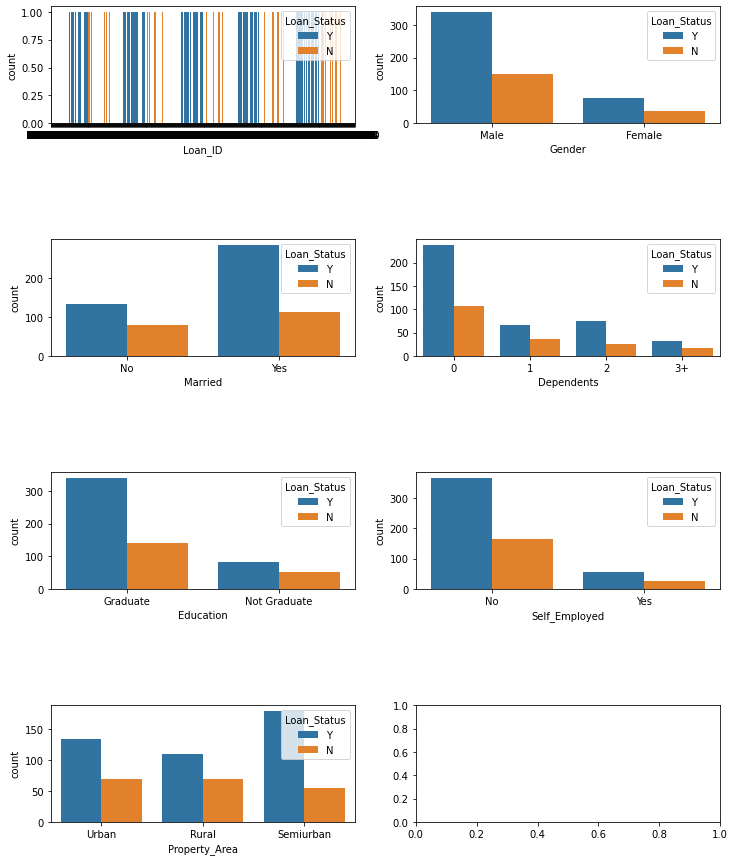

In [56]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(cat_data):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=loan,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

IndexError: index 3 is out of bounds for axis 0 with size 3

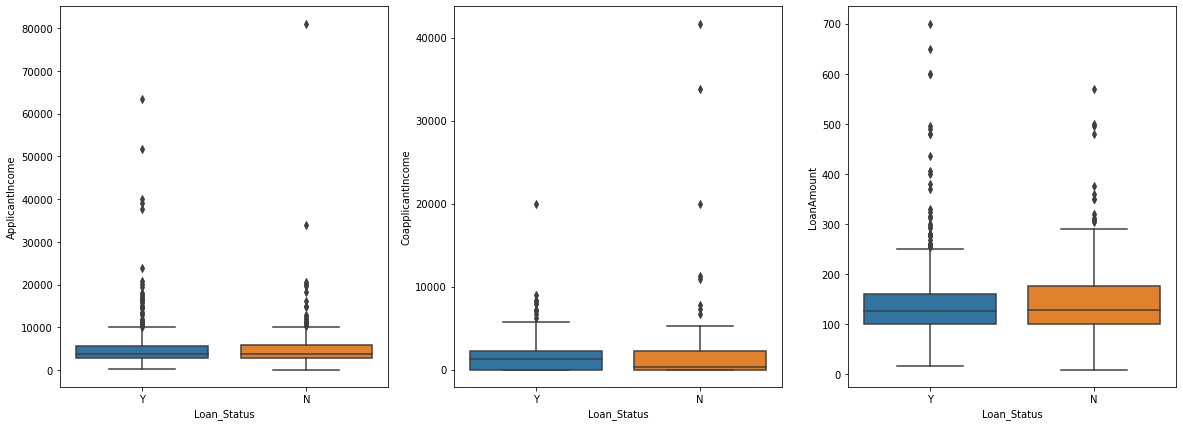

In [57]:
fig,axes = plt.subplots(1,3,figsize=(20,7))
for idx,cat_col in enumerate(num_data):
    sns.boxplot(y=cat_col,data=loan,x='Loan_Status',ax=axes[idx])

print(loan[num_data].describe())
plt.subplots_adjust(hspace=1)

In [58]:
loan = pd.concat([cat_data, num_data, target],axis=1)

In [59]:
loan= loan.drop(['Loan_ID'],axis=1)

In [60]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,LoanAmount_log,Loan_Status
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0,5849.0,4.852030,1
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0,6091.0,4.852030,0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0,3000.0,4.189655,1
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0,4941.0,4.787492,1
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0,6000.0,4.948760,1


In [61]:
X = pd.concat([num_data, cat_data],axis=1)
y= target

In [63]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,LoanAmount_log,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,5849.0,0.0,128.0,360.0,1.0,5849.0,4.852030,0,1,0,0,0,0,2
1,4583.0,1508.0,128.0,360.0,1.0,6091.0,4.852030,1,1,1,1,0,0,0
2,3000.0,0.0,66.0,360.0,1.0,3000.0,4.189655,2,1,1,0,0,1,2
3,2583.0,2358.0,120.0,360.0,1.0,4941.0,4.787492,3,1,1,0,1,0,2
4,6000.0,0.0,141.0,360.0,1.0,6000.0,4.948760,4,1,0,0,0,0,2


In [64]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [65]:
X.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
TotalIncome          0
LoanAmount_log       0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
dtype: int64

In [66]:
y.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Name: Loan_Status, Length: 614, dtype: bool

In [68]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (491, 14)
y_train shape (491,)
X_test shape (123, 14)
y_test shape (123,)


In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [71]:
model.fit(X, y)

LogisticRegression(random_state=0, solver='liblinear')

In [72]:
model.predict_proba(X)

array([[0.26838731, 0.73161269],
       [0.22027517, 0.77972483],
       [0.15384748, 0.84615252],
       ...,
       [0.16162091, 0.83837909],
       [0.14130229, 0.85869771],
       [0.78503319, 0.21496681]])

In [73]:
model.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [74]:
model.score(X, y)

0.8061889250814332

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y, model.predict(X))

array([[ 86, 106],
       [ 13, 409]], dtype=int64)

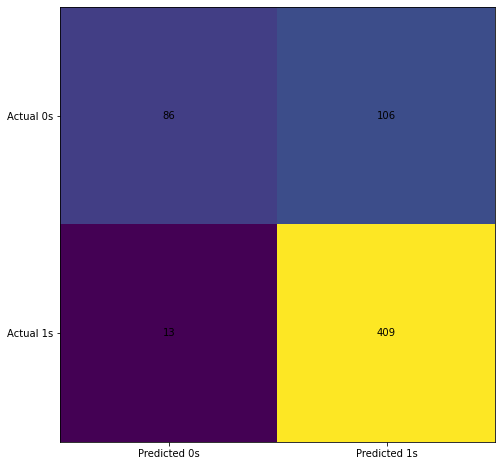

In [76]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

In [77]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.87      0.45      0.59       192
           1       0.79      0.97      0.87       422

    accuracy                           0.81       614
   macro avg       0.83      0.71      0.73       614
weighted avg       0.82      0.81      0.78       614



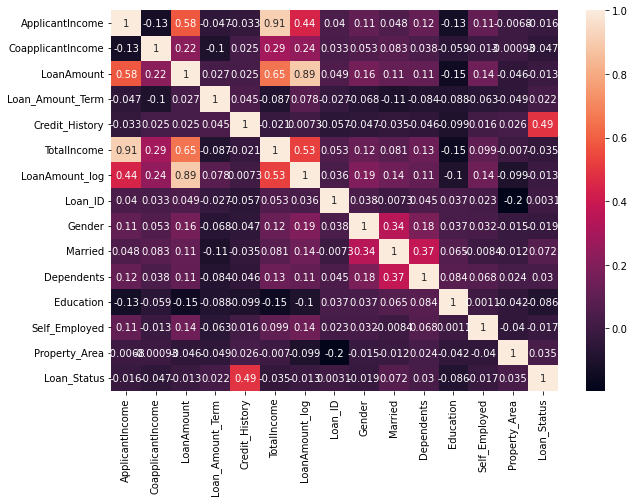

In [78]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [79]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

<AxesSubplot:xlabel='Decision Threshold', ylabel='Values'>

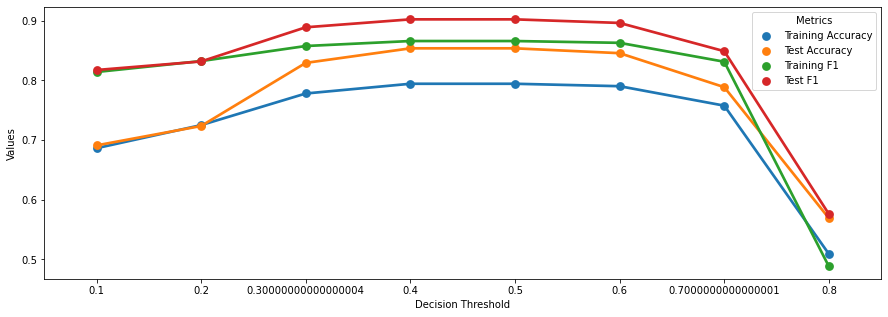

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_predict

train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

#for thresh in np.linspace(0.1,0.9,8): ## Sweeping from threshold of 0.1 to 0.9
for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(X_train,y_train)
    
    y_pred_train_thresh = logreg_clf.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)
    
    y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
    
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [81]:
thresh = 0.4 ### Threshold chosen from above Curves
y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8536585365853658
Test F1 Score:  0.9021739130434783
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,22,16,38
1,2,83,85
All,24,99,123


# *********************DONE******************